In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.loadtxt("Data\data.csv", delimiter=",")


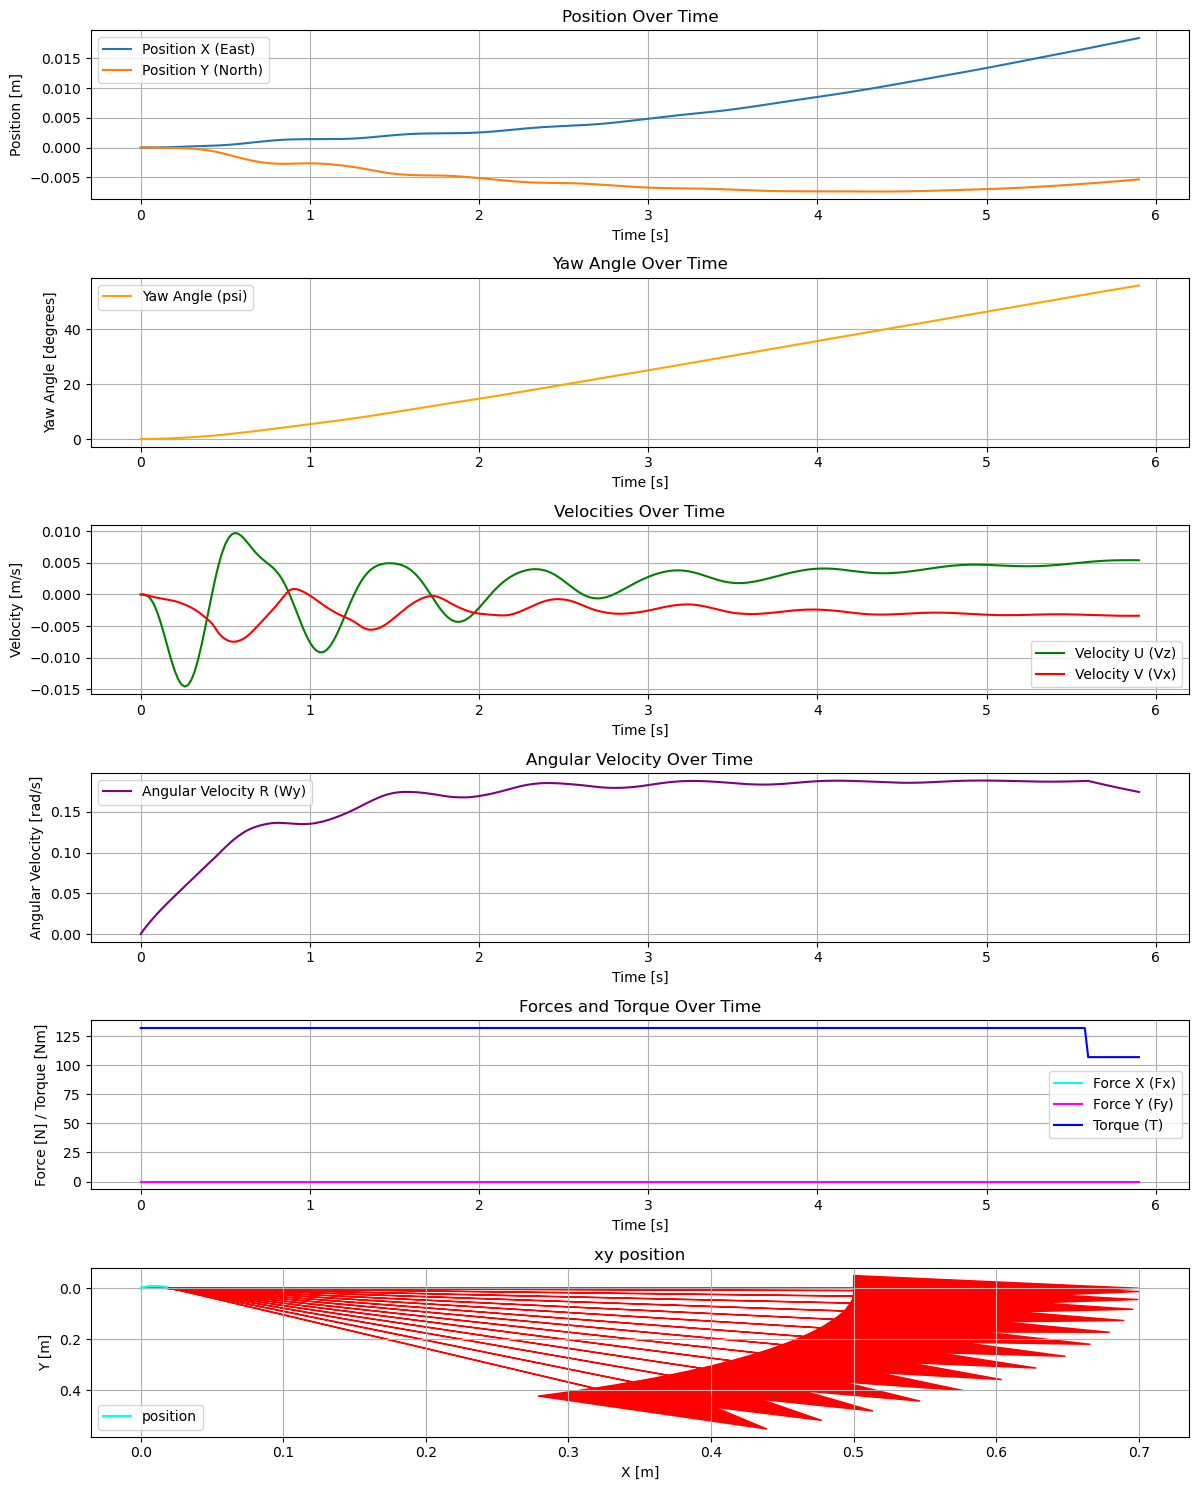

In [3]:
def draw_arrow(ax, x, y, yaw, length=0.5):
    dx = length * np.cos(np.radians(yaw))
    dy = length * np.sin(np.radians(yaw))
    ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.2, fc='red', ec='red')

# Extract the columns into variables for better readability.
t = data[:, 0]
x = data[:, 1]
y = data[:, 2]
psi = data[:, 3]
u = data[:, 4]
v = data[:, 5]
r = data[:, 6]
Fx = data[:, 7]
Fy = data[:, 8]
T = data[:, 9]

# Create subplots for each category of data.
fig, axs = plt.subplots(6, 1, figsize=(12, 15))  # 5 rows of plots

# Position over time (North and East positions)
axs[0].plot(t, x, label='Position X (East)')
axs[0].plot(t, y, label='Position Y (North)')
axs[0].set_title('Position Over Time')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Position [m]')
axs[0].legend()
axs[0].grid()

# Yaw angle (psi) over time
axs[1].plot(t, psi, label='Yaw Angle (psi)', color='orange')
axs[1].set_title('Yaw Angle Over Time')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Yaw Angle [degrees]')
axs[1].legend()
axs[1].grid()

# Velocities over time
axs[2].plot(t, u, label='Velocity U (Vz)', color='green')
axs[2].plot(t, v, label='Velocity V (Vx)', color='red')
axs[2].set_title('Velocities Over Time')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel('Velocity [m/s]')
axs[2].legend()
axs[2].grid()

# Angular velocity over time
axs[3].plot(t, r, label='Angular Velocity R (Wy)', color='purple')
axs[3].set_title('Angular Velocity Over Time')
axs[3].set_xlabel('Time [s]')
axs[3].set_ylabel('Angular Velocity [rad/s]')
axs[3].legend()
axs[3].grid()

# Forces and Torque over time
axs[4].plot(t, Fx, label='Force X (Fx)', color='cyan')
axs[4].plot(t, Fy, label='Force Y (Fy)', color='magenta')
axs[4].plot(t, T, label='Torque (T)', color='blue')
axs[4].set_title('Forces and Torque Over Time')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Force [N] / Torque [Nm]')
axs[4].legend()
axs[4].grid()

# xy position plot
axs[5].plot(x, y, label='position', color='cyan')
# Drawing arrowheads to indicate orientation at every 10th point
for i in range(0, len(x), 20):
    draw_arrow(axs[5], x[i], y[i], psi[i])
axs[5].set_title('xy position')
axs[5].set_xlabel('X [m]')
axs[5].set_ylabel('Y [m]')
axs[5].legend()
axs[5].grid()
axs[5].invert_yaxis()  # This will flip the Y-axis


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
